# Predict if survived from the Titanic

- https://www.kaggle.com/michaelabehsera/titanic-solution-a-beginner-s-guide
- https://www.kaggle.com/sashr07/kaggle-titanic-tutorial

## Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/titanic_train.csv") # we assume we don't have test set.

## Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Passenger_Id                     891 non-null int64
Survived                         891 non-null int64
Passenger_Class                  891 non-null object
Name                             891 non-null object
Sex                              891 non-null object
Age                              714 non-null float64
Number_of_Siblings_or_Spouses    891 non-null int64
Number_of_Parents_or_Children    891 non-null int64
Ticket_Number                    891 non-null object
Passenger_Fare                   891 non-null float64
Cabin                            204 non-null object
Port_of_Embarkation              889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
df.describe()

,Passenger_Id,Survived,Age,Number_of_Siblings_or_Spouses,Number_of_Parents_or_Children,Passenger_Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include=['object'])

,Passenger_Class,Name,Sex,Ticket_Number,Cabin,Port_of_Embarkation
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,Third,"Vovk, Mr. Janko",male,1601,B96 B98,Southampton
freq,491,1,577,7,4,644


In [6]:
np.random.seed(10)
df.sample(10)

,Passenger_Id,Survived,Passenger_Class,Name,Sex,Age,Number_of_Siblings_or_Spouses,Number_of_Parents_or_Children,Ticket_Number,Passenger_Fare,Cabin,Port_of_Embarkation
590,591,0,Third,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,Southampton
131,132,0,Third,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,Southampton
628,629,0,Third,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,Southampton
195,196,1,First,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,Cherbourg
230,231,1,First,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,Southampton
646,647,0,Third,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,Southampton
75,76,0,Third,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,Southampton
586,587,0,Second,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,Southampton
569,570,1,Third,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,Southampton
287,288,0,Third,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,Southampton


In [7]:
df.isnull().sum()

Passenger_Id                       0
Survived                           0
Passenger_Class                    0
Name                               0
Sex                                0
Age                              177
Number_of_Siblings_or_Spouses      0
Number_of_Parents_or_Children      0
Ticket_Number                      0
Passenger_Fare                     0
Cabin                            687
Port_of_Embarkation                2
dtype: int64

0    549
1    342
Name: Survived, dtype: int64

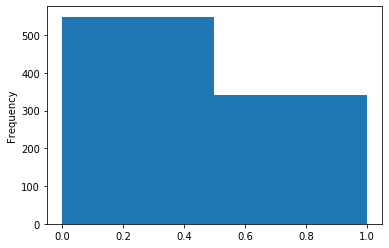

In [8]:
df.Survived.plot.hist(bins=2)
df.Survived.value_counts()

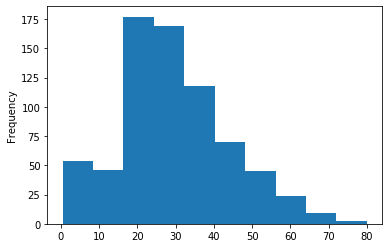

In [9]:
df.Age.plot(kind='hist')

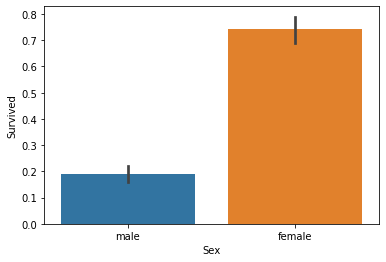

In [10]:
# Sex vs. Survival
# df[['Sex', 'Survived']].groupby("Sex").mean().plot(kind="bar")
sns.barplot(x="Sex", y="Survived", data=df)

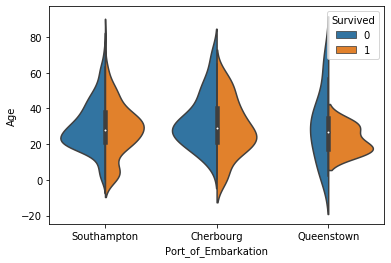

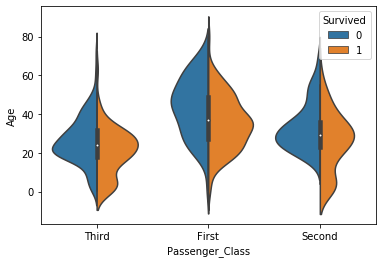

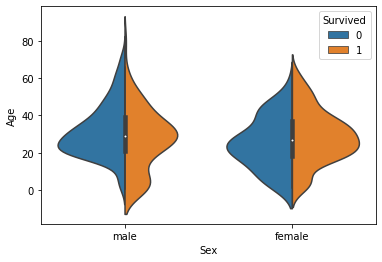

In [11]:
sns.violinplot(x="Port_of_Embarkation", y="Age", hue="Survived", data=df, split=True)
plt.show()
sns.violinplot(x="Passenger_Class", y="Age", hue="Survived", data=df, split=True)
plt.show()
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True)
plt.show()

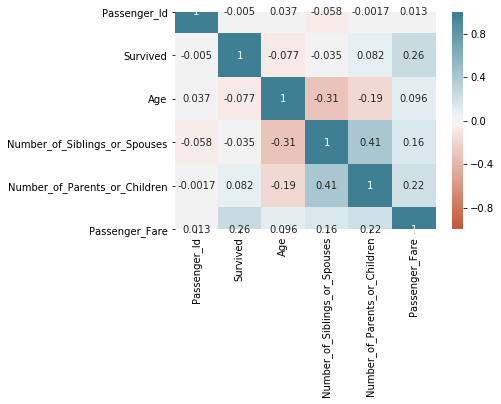

In [12]:
# corr = df.drop('Passenger_Id',axis=1).corr()
corr = df.corr()

# plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, vmin=-1, square=True, annot=True, cmap=sns.diverging_palette(20, 220, n=200))

## Split

- train set: 70%
- test set: 30%

Remove rows where target is not available

In [13]:
np.random.seed(10)
raw_train_data = df.sample(frac=0.7)
raw_test_data = df.drop(raw_train_data.index) # creates new pd.DataFrame object as always

## Transformation

- category to one-hot encoding
  - use some classes only which are more than 30 rows
- standardize fields
- fill not available values as its mean
- keep each transformation information and reuse them for testing
  - test set should not be analyzed to be fair.

In [14]:
all_column_names = set(df.columns)

df_categories = df.select_dtypes('object').astype('category')
category_column_names = set(df_categories.columns)

number_column_names = all_column_names - category_column_names

print(number_column_names)
print(category_column_names)

{'Passenger_Id', 'Passenger_Fare', 'Number_of_Parents_or_Children', 'Number_of_Siblings_or_Spouses', 'Age', 'Survived'}
{'Ticket_Number', 'Passenger_Class', 'Name', 'Sex', 'Cabin', 'Port_of_Embarkation'}


In [15]:
def get_valid_values(series, min_category_counts=30):
        all_val_counts = series.dropna().value_counts()
        all_val_counts = all_val_counts[all_val_counts >= min_category_counts]
        return all_val_counts.index

class BinaryEncoding():
    """binary-string to one-hot"""
    
    min_category_counts = 30
    
    def __init__(self):
        self.mapping = {} # {field: {class1: 0.0, class2: 1.0}

    def fit(self, df):
        for col_name in df.columns:
            if not pd.api.types.is_string_dtype(df[col_name].dtype):
                continue
            unique_values = get_valid_values(df[col_name], min_category_counts=self.min_category_counts)

            if len(unique_values) != 2:
                continue
            for val in unique_values:
                self.mapping[col_name] = {unique_values[i]: float(i) for i in range(len(unique_values))}

    def transform(self, df):
        for col_name in self.mapping:
            df[col_name] = df[col_name].map(self.mapping[col_name])

class OneHotEncoding():
    """multi-class-string to one-hot"""
    prefix_sep = '!'
    min_category_counts = 30

    def __init__(self):
        self.column_mapping = {} # {field: {class1, class2, class3, ...}}

    def fit(self, df):
        for col_name in df.columns:
            if not pd.api.types.is_string_dtype(df[col_name].dtype):
                continue
            unique_values = get_valid_values(df[col_name], min_category_counts=self.min_category_counts)

            if len(unique_values) <= 2:
                continue
            self.column_mapping[col_name] = set(unique_values)

    def transform(self, df):
        column_names = set(self.column_mapping)
        for col_name in column_names:
            values = self.column_mapping[col_name]
            for val in values:
                new_col_name = "{}{}{}".format(col_name, self.prefix_sep, val)
                df[new_col_name] = (df[col_name] == val).astype('float64')
        df.drop(columns=list(column_names), inplace=True)
    
class Standardization():
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, df):
        self.mean = df.mean()
        self.std = df.std()

    def transform(self, df):
        transform_columns = self.mean.index
        input_columns = set(df.columns)
        for col_name in transform_columns:
            if col_name in input_columns:
                df[col_name] = (df[col_name] - self.mean[col_name])/self.std[col_name]

class Imputation():
    def __init__(self):
        self.mean = None

    def fit(self, df):
        self.mean = df.mean()

    def transform(self, df):
        for col_name in df.columns:
            if pd.api.types.is_numeric_dtype(df[col_name].dtype):
                df[col_name].fillna(self.mean[col_name], inplace=True)

class ColumnRemover():
    def __init__(self):
        self.column_names = set()

    def fit(self, df):
        for col_name in df.columns:
            if pd.api.types.is_numeric_dtype(df[col_name].dtype):
                self.column_names.add(col_name)
    def transform(self, df):
        for col_name in df.columns:
            if col_name not in self.column_names:
                df.drop(columns=col_name, inplace=True)
                
class FloatConverter():
    def __init__(self):
        self.column_names = set()

    def fit(self, df):
        for col_name in df.columns:
            if pd.api.types.is_numeric_dtype(df[col_name].dtype):
                self.column_names.add(col_name)
    def transform(self, df):
        for col_name in df.columns:
            if col_name in self.column_names:
                df[col_name] = df[col_name].astype('float64')

class Chain():
    def __init__(self, transforms):
        self.transforms = transforms

    def fit_transform(self, df):
        for tr in self.transforms:
            tr.fit(df)
            tr.transform(df)
    
    def transform(self, df):
        for tr in self.transforms:
            tr.transform(df)

target_column_name = 'Survived'
fields_to_ignore = ["Name", "Passenger_Id"] + [target_column_name]
input_transform_chain = Chain([BinaryEncoding(), OneHotEncoding(), Imputation(), Standardization(), ColumnRemover(), FloatConverter()])
train_data_x = raw_train_data.copy().drop(columns=fields_to_ignore)
input_transform_chain.fit_transform(train_data_x)
train_data_x

,Sex,Age,Number_of_Siblings_or_Spouses,Number_of_Parents_or_Children,Passenger_Fare,Port_of_Embarkation!Queenstown,Port_of_Embarkation!Southampton,Port_of_Embarkation!Cherbourg,Passenger_Class!Second,Passenger_Class!First,Passenger_Class!Third
590,-0.724451,0.425540,-0.496711,-0.470389,-0.500695,-0.298098,0.618852,-0.490073,-0.502600,-0.574422,0.904394
131,-0.724451,-0.718107,-0.496711,-0.470389,-0.502181,-0.298098,0.618852,-0.490073,-0.502600,-0.574422,0.904394
628,-0.724451,-0.260648,-0.496711,-0.470389,-0.485420,-0.298098,0.618852,-0.490073,-0.502600,-0.574422,0.904394
195,1.378143,2.179132,-0.496711,-0.470389,2.261676,-0.298098,-1.613307,2.037244,-0.502600,1.738090,-1.103940
230,1.378143,0.425540,0.474912,-0.470389,1.012314,-0.298098,0.618852,-0.490073,-0.502600,1.738090,-1.103940
...,...,...,...,...,...,...,...,...,...,...,...
620,-0.724451,-0.184405,0.474912,-0.470389,-0.355454,-0.298098,-1.613307,2.037244,-0.502600,-0.574422,0.904394
291,1.378143,-0.794350,0.474912,-0.470389,1.163004,-0.298098,-1.613307,2.037244,-0.502600,1.738090,-1.103940
800,-0.724451,0.349297,-0.496711,-0.470389,-0.384272,-0.298098,0.618852,-0.490073,1.986466,-0.574422,-1.103940
787,-0.724451,-1.633025,3.389782,0.773351,-0.064726,3.349222,-1.613307,-0.490073,-0.502600,-0.574422,0.904394


In [16]:
label_transform = FloatConverter()
train_data_y = raw_train_data[[target_column_name]].copy()
label_transform.fit(train_data_y)
label_transform.transform(train_data_y)
train_data_y

,Survived
590,0.0
131,0.0
628,0.0
195,1.0
230,1.0
...,...
620,0.0
291,1.0
800,0.0
787,0.0


In [17]:
test_data_x = raw_test_data.copy().drop(columns=fields_to_ignore)
input_transform_chain.transform(test_data_x)
test_data_x

,Sex,Age,Number_of_Siblings_or_Spouses,Number_of_Parents_or_Children,Passenger_Fare,Port_of_Embarkation!Queenstown,Port_of_Embarkation!Southampton,Port_of_Embarkation!Cherbourg,Passenger_Class!Second,Passenger_Class!First,Passenger_Class!Third
0,-0.724451,-5.656210e-01,0.474912,-0.470389,-0.498218,-0.298098,0.618852,-0.490073,-0.502600,-0.574422,0.904394
4,-0.724451,4.255397e-01,-0.496711,-0.470389,-0.482364,-0.298098,0.618852,-0.490073,-0.502600,-0.574422,0.904394
5,-0.724451,2.708700e-16,-0.496711,-0.470389,-0.474273,3.349222,-1.613307,-0.490073,-0.502600,-0.574422,0.904394
8,1.378143,-1.844053e-01,-0.496711,2.017092,-0.421263,-0.298098,0.618852,-0.490073,-0.502600,-0.574422,0.904394
9,1.378143,-1.175566e+00,0.474912,-0.470389,-0.045984,-0.298098,-1.613307,2.037244,1.986466,-0.574422,-1.103940
...,...,...,...,...,...,...,...,...,...,...,...
879,1.378143,2.026645e+00,-0.496711,0.773351,1.006038,-0.298098,-1.613307,2.037244,-0.502600,1.738090,-1.103940
881,-0.724451,2.730535e-01,-0.496711,-0.470389,-0.485420,-0.298098,0.618852,-0.490073,-0.502600,-0.574422,0.904394
882,1.378143,-5.656210e-01,-0.496711,-0.470389,-0.433482,-0.298098,0.618852,-0.490073,-0.502600,-0.574422,0.904394
883,-0.724451,-1.081622e-01,-0.496711,-0.470389,-0.433813,-0.298098,0.618852,-0.490073,1.986466,-0.574422,-1.103940


In [18]:
test_data_y = raw_test_data[[target_column_name]].copy()
label_transform.transform(test_data_y)
test_data_y

,Survived
0,0.0
4,0.0
5,0.0
8,1.0
9,1.0
...,...
879,1.0
881,0.0
882,0.0
883,0.0


## Training

### Vanilla NumPy

- logistic regression
- numerical differentiation

In [19]:
np.random.seed(10)

x_train = train_data_x.values
y_train = train_data_y.values
x_test = test_data_x.values
y_test = test_data_y.values

def mse(y_pred, y):
    return np.mean((y_pred - y)**2)

def sigmoid(x):
    return 1.0 / (1.0 + np.e**(-x))

class LogisticRegression:
    def __init__(self, n_input_fields):
        n_output_fields = 1
        shape = (n_input_fields + 1, n_output_fields)
        self.weight = np.random.normal(0, (1 / n_input_fields) ** 0.5 , shape)

    def forward(self, x, weight=None):
        if weight is None:
            weight = self.weight
        y_pred = sigmoid(x@weight[1:] + weight[0])
        return y_pred

model = LogisticRegression(x_train.shape[1])
lr = 0.01
epochs = 2000

for epoch in range(epochs):
    diff = np.zeros(model.weight.shape)
    weight = model.weight.copy()
    
    y_pred1 = model.forward(x_train)
    loss1 = mse(y_pred1, y_train)
    
    for wi in range(model.weight.shape[0]):
        h = 0.0000000000001
        weight[wi][0] += h
        y_pred2 = model.forward(x_train, weight)
        loss2 = mse(y_pred2, y_train)
        diff[wi][0] = (loss2 - loss1) / h
        weight[wi][0] = model.weight[wi][0]
    model.weight -= (lr * diff)

y_pred = model.forward(x_test)

print("predicted y values:")
for i in range(10):
    print(i, y_pred[i][0])

y_pred = (y_pred >= 0.5).astype(np.float64)
accuracy_test = np.mean(np.equal(y_pred, y_test))
print("accuracy:", accuracy_test)

print("weights:", model.weight)

predicted y values:
0 0.1597224836324516
1 0.1347548981174484
2 0.2092278138203528
3 0.5786473517581571
4 0.8376702788109559
5 0.12630092275612614
6 0.6151237944387421
7 0.5015415962403821
8 0.6364551085070099
9 0.43471873410754985
accuracy: 0.8164794007490637
weights: [[-0.41113653]
 [ 0.89946774]
 [-0.36333225]
 [-0.1636767 ]
 [ 0.02287696]
 [ 0.11528681]
 [ 0.08976921]
 [-0.02105892]
 [ 0.04598039]
 [ 0.22860885]
 [ 0.51864354]
 [-0.20120559]]


### PyTorch - 1

- logistic regression

In [20]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F

torch.manual_seed(10)
np.random.seed(10)

x_train = torch.Tensor(train_data_x.values)
y_train = torch.Tensor(train_data_y.values)
x_test = torch.Tensor(test_data_x.values)
y_test = test_data_y.values

class LogisticRegression(torch.nn.Module):
    def __init__(self, n_input_fields):
        super().__init__()
        n_output_fields = 1
        self.linear = torch.nn.Linear(n_input_fields, n_output_fields)

    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegression(x_train.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for epoch in range(2000):
    model.train()
    optimizer.zero_grad()    # Forward pass
    y_pred = model(x_train)    # Compute Loss
    loss = criterion(y_pred, y_train)    # Backward pass
    loss.backward()
    optimizer.step()
    
y_pred = model(x_test)

print("predicted y values:")
for i in range(10):
    print(i, y_pred.data[i][0])

y_pred = y_pred.detach().numpy()
y_pred = (y_pred >= 0.5).astype(np.float64)
accuracy_test = np.mean(np.equal(y_pred, y_test))
print("accuracy:", accuracy_test)

print("weights:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

/home/hotohoto/playground/ml_course/venv/lib/python3.6/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


predicted y values:
0 tensor(0.1515)
1 tensor(0.1338)
2 tensor(0.1973)
3 tensor(0.5362)
4 tensor(0.8313)
5 tensor(0.1208)
6 tensor(0.6383)
7 tensor(0.4861)
8 tensor(0.6034)
9 tensor(0.4328)
accuracy: 0.8052434456928839
weights:
linear.weight tensor([[ 0.8680, -0.2765, -0.1303,  0.0041,  0.1499,  0.1454,  0.0827,  0.1709,
          0.1171,  0.2995, -0.3572]])
linear.bias tensor([-0.4821])


### PyTorch - 2

- neural net

In [21]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F

torch.manual_seed(10)
np.random.seed(10)

x_train = torch.Tensor(train_data_x.values)
y_train = torch.Tensor(train_data_y.values)
x_test = torch.Tensor(test_data_x.values)
y_test = test_data_y.values

class MyNeuralNet(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        output_size = 1
        hidden1_size = 10
        hidden2_size = 10
        self.linear1 = torch.nn.Linear(input_size, hidden1_size)
        self.linear2 = torch.nn.Linear(hidden1_size, hidden2_size)
        self.linear3 = torch.nn.Linear(hidden2_size, output_size)

    def forward(self, x):
        hidden1 = F.relu(self.linear1(x))
        hidden2 = F.relu(self.linear2(hidden1))
        y_pred = F.sigmoid(self.linear3(hidden2))
        return y_pred

model = MyNeuralNet(x_train.shape[1])
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for epoch in range(4000):
    model.train()
    optimizer.zero_grad()    # Forward pass
    y_pred = model(x_train)    # Compute Loss
    loss = criterion(y_pred, y_train)    # Backward pass
    loss.backward()
    optimizer.step()
    
y_pred = model(x_test)

print("predicted y values:")
for i in range(10):
    print(i, y_pred.data[i][0])

y_pred = y_pred.detach().numpy()
y_pred = (y_pred >= 0.5).astype(np.float64)
accuracy_test = np.mean(np.equal(y_pred, y_test))
print("accuracy:", accuracy_test)

print("weights:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

predicted y values:
0 tensor(0.2115)
1 tensor(0.1948)
2 tensor(0.2136)
3 tensor(0.4964)
4 tensor(0.8892)
5 tensor(0.2107)
6 tensor(0.6509)
7 tensor(0.4033)
8 tensor(0.4965)
9 tensor(0.3299)
accuracy: 0.8127340823970037
weights:
linear1.weight tensor([[-1.1275e-01,  6.4547e-02, -1.2255e-01,  6.6003e-02, -1.6518e-01,
         -5.0285e-02,  8.7937e-02,  3.1375e-01,  5.7316e-02, -8.1490e-02,
          2.1911e-02],
        [ 2.7272e-01,  4.0660e-04,  1.9659e-02,  4.3361e-02,  2.8620e-01,
         -1.3441e-01,  2.1759e-02,  3.4624e-02,  7.2554e-02,  3.1960e-02,
         -3.7979e-01],
        [-3.8923e-01, -1.4411e-01, -3.1861e-01, -3.5204e-01, -2.5926e-01,
         -2.1900e-01, -2.5338e-01,  6.3967e-02,  1.6313e-01,  1.7444e-01,
          2.0546e-01],
        [ 3.8391e-02,  1.8458e-01, -1.6454e-01,  3.0631e-01, -3.9319e-03,
          2.4434e-01,  8.4964e-02,  2.5535e-01,  1.8994e-01, -4.5282e-02,
         -6.2273e-02],
        [ 2.8402e-01, -7.5464e-02,  1.9029e-02,  1.0993e-01, -2.1986e-01,